Filter Functions

In [0]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
 
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

FFT SHIFTED FFT and Reverse FFT

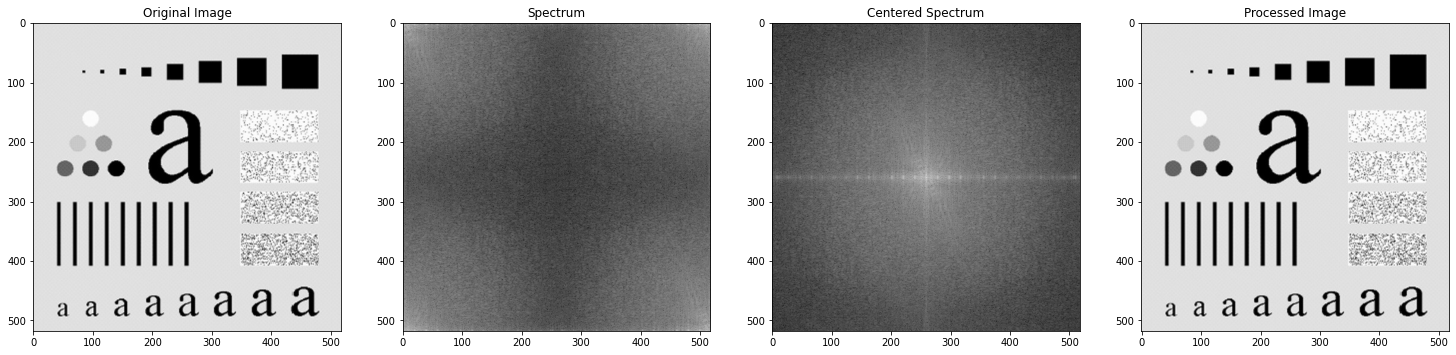

In [16]:
import cv2
import numpy as np
from math import sqrt, exp
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("a.jpg", 0)
img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

Ideal Filter

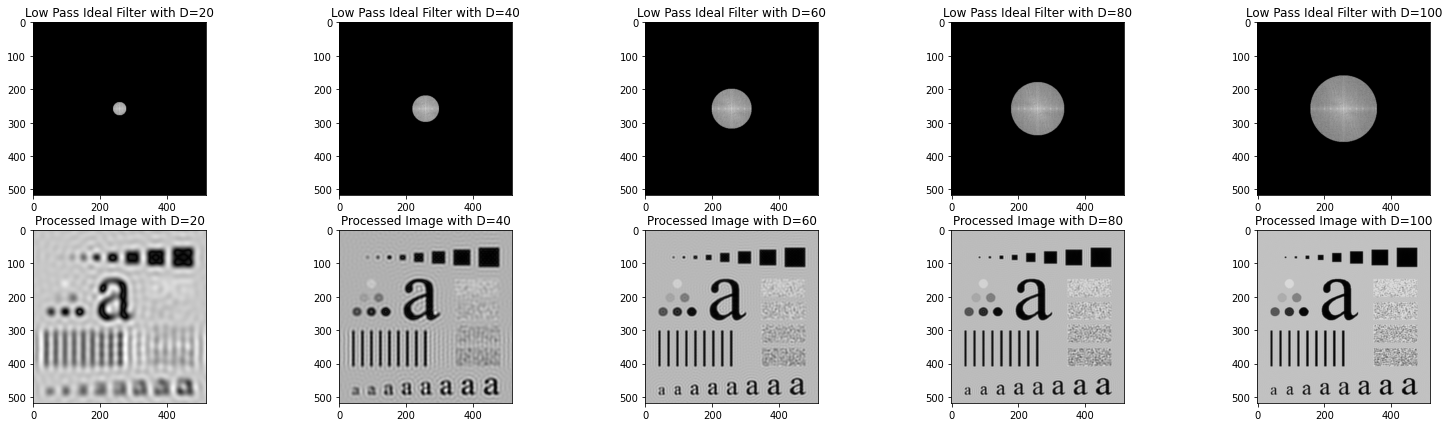

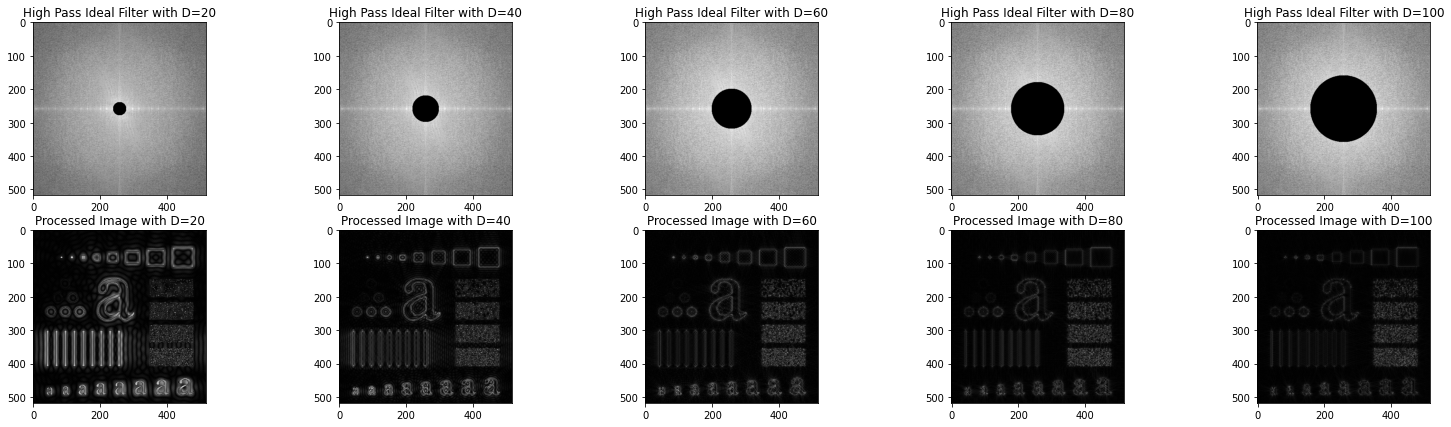

In [17]:
plt.figure(figsize=(6.4*5, 7), constrained_layout=False)
for d in range(1, 6):
  filtered = img_c3 * idealFilterLP(d*20,img.shape)
  plt.subplot(2, 6, d), plt.imshow(np.log(1+np.abs(filtered)), "gray"), plt.title(f"Low Pass Ideal Filter with D={d*20}")
  LowPass = np.fft.ifftshift(filtered)
  inverse_LowPass = np.fft.ifft2(LowPass)
  plt.subplot(2, 6, d+6), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title(f"Processed Image with D={d*20}")

plt.show()

plt.figure(figsize=(6.4*5, 7), constrained_layout=False)
for d in range(1, 6):
  filtered = img_c3 * idealFilterHP(d*20,img.shape)
  plt.subplot(2, 6, d), plt.imshow(np.log(1+np.abs(filtered)), "gray"), plt.title(f"High Pass Ideal Filter with D={d*20}")
  LowPass = np.fft.ifftshift(filtered)
  inverse_LowPass = np.fft.ifft2(LowPass)
  plt.subplot(2, 6, d+6), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title(f"Processed Image with D={d*20}")

plt.show()

Butterworth Filter

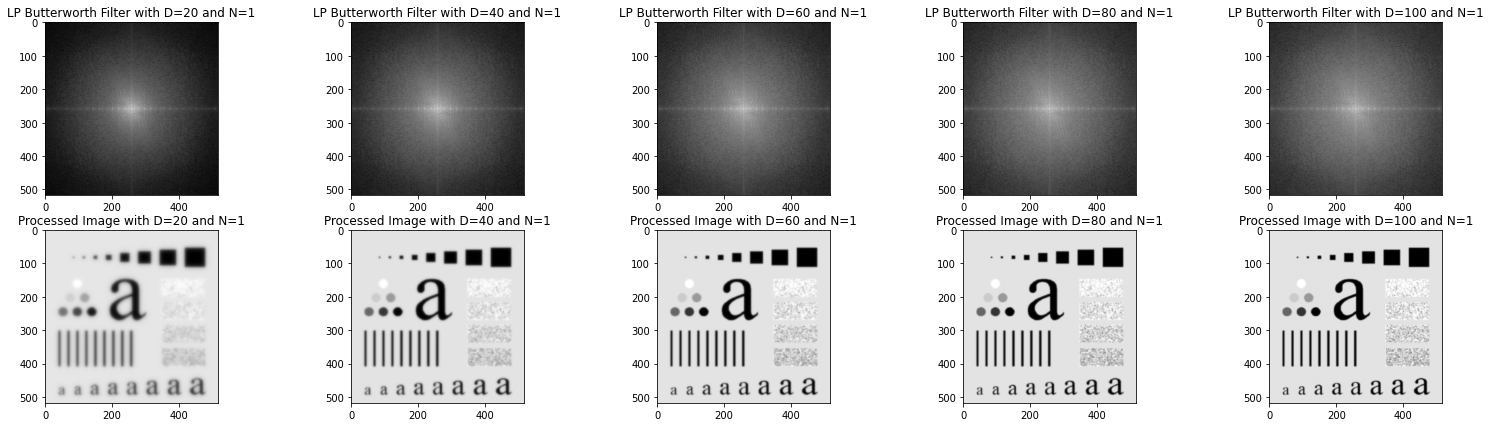

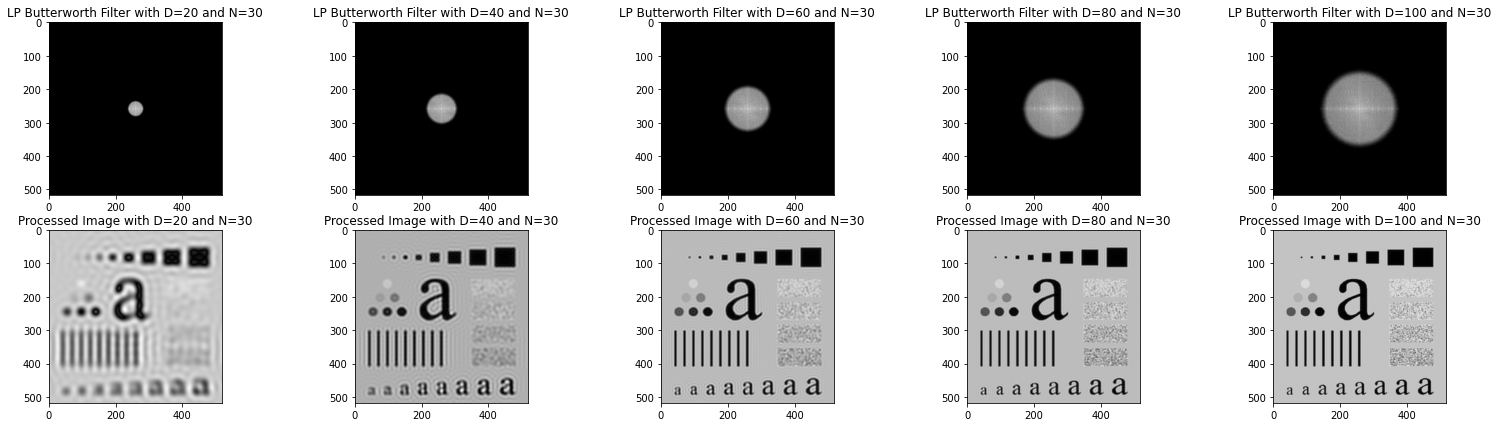

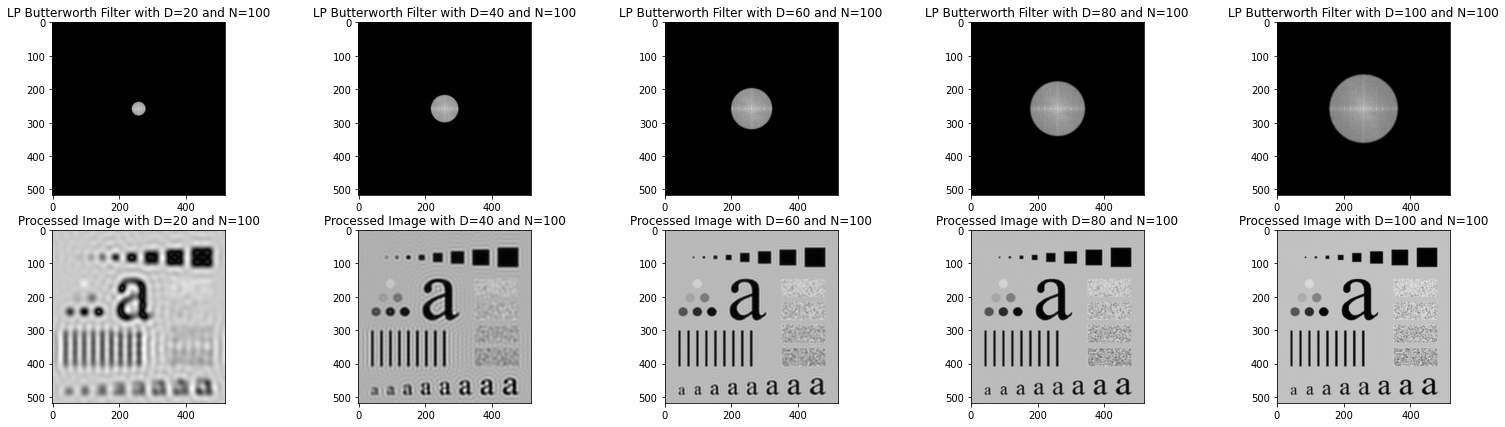

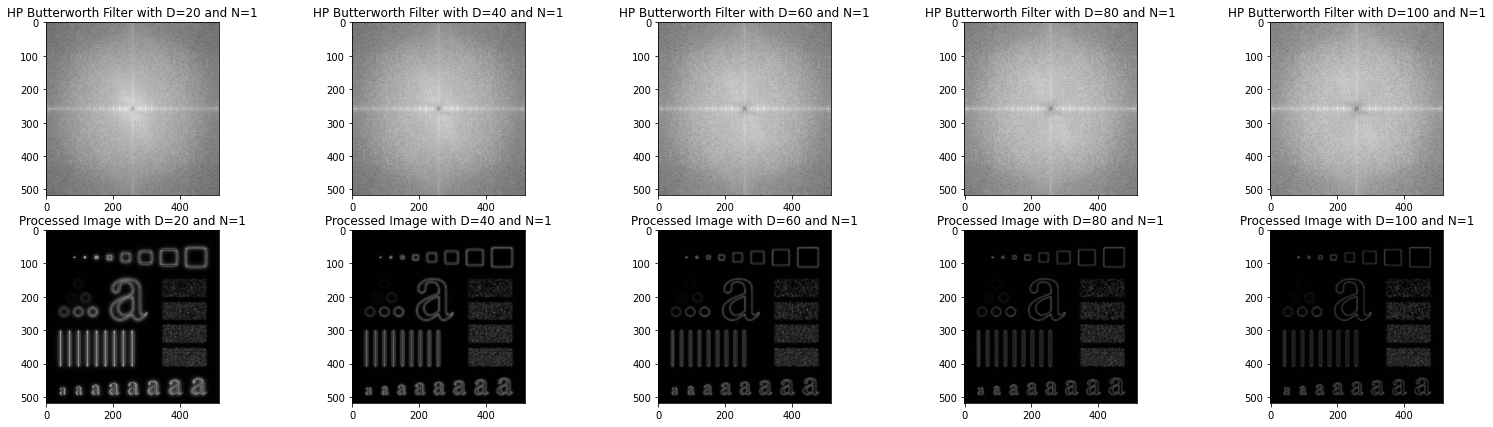

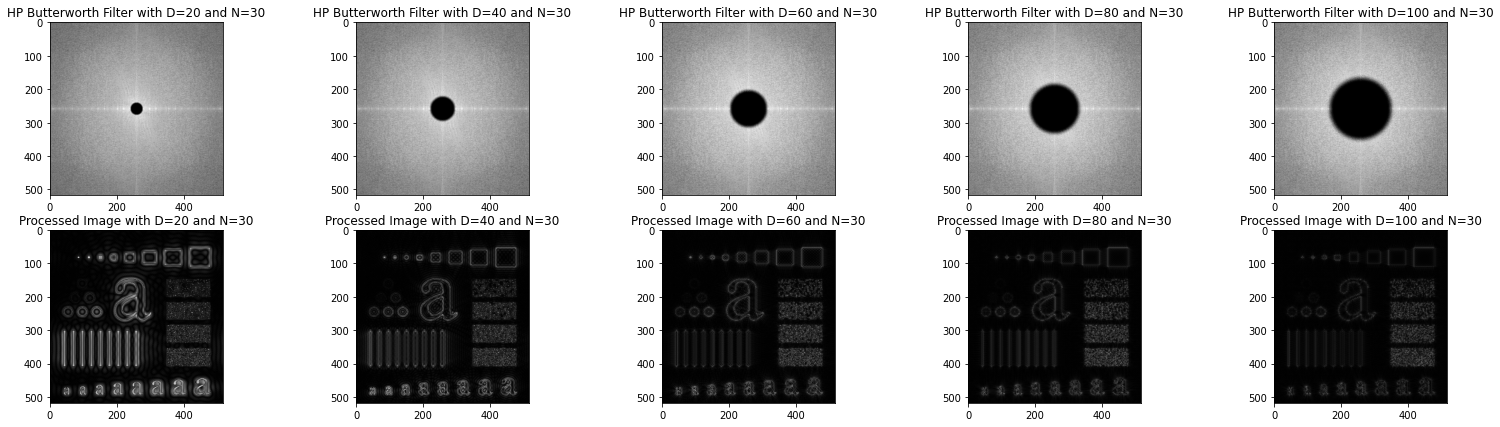

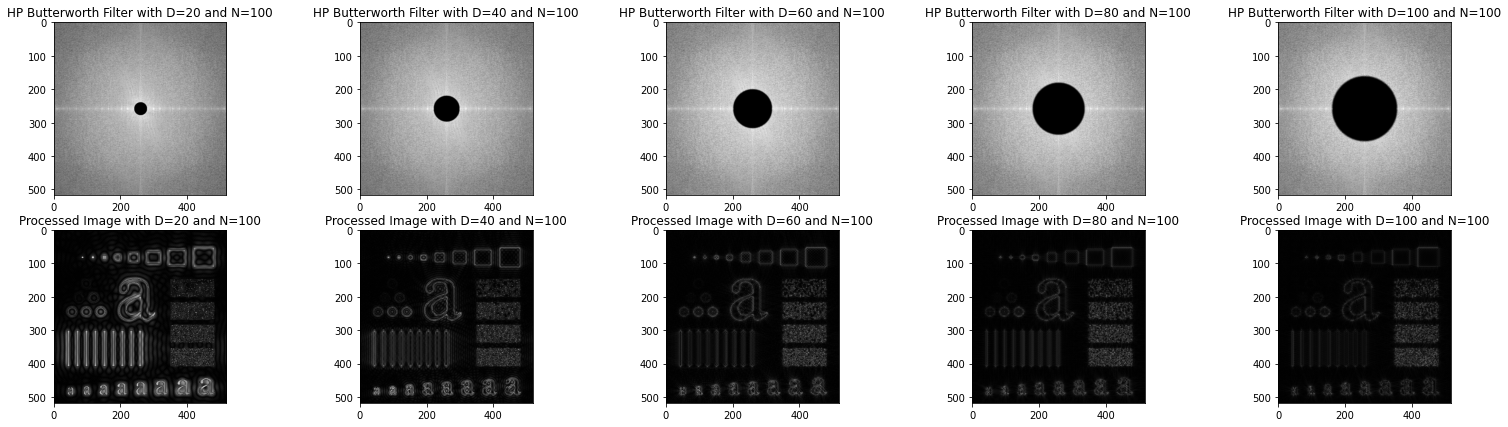

In [24]:
for N in range(1, 4):
  plt.figure(figsize=(6.4*5, 7), constrained_layout=False)
  if N==1:
    n=1
  elif N==2:
    n=30
  else:
    n=100
  for d in range(1, 6):
    filtered = img_c3 * butterworthLP(d*20,img.shape, n)
    plt.subplot(2, 6, d), plt.imshow(np.log(1+np.abs(filtered)), "gray"), plt.title(f"LP Butterworth Filter with D={d*20} and N={n}")
    LowPass = np.fft.ifftshift(filtered)
    inverse_LowPass = np.fft.ifft2(LowPass)
    plt.subplot(2, 6, d+6), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title(f"Processed Image with D={d*20} and N={n}")

  plt.show()

for N in range(1, 4):
  plt.figure(figsize=(6.4*5, 7), constrained_layout=False)
  if N==1:
    n=1
  elif N==2:
    n=30
  else:
    n=100
  for d in range(1, 6):
    filtered = img_c3 * butterworthHP(d*20,img.shape, n)
    plt.subplot(2, 6, d), plt.imshow(np.log(1+np.abs(filtered)), "gray"), plt.title(f"HP Butterworth Filter with D={d*20} and N={n}")
    LowPass = np.fft.ifftshift(filtered)
    inverse_LowPass = np.fft.ifft2(LowPass)
    plt.subplot(2, 6, d+6), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title(f"Processed Image with D={d*20} and N={n}")

  plt.show()

Gaussian Filter

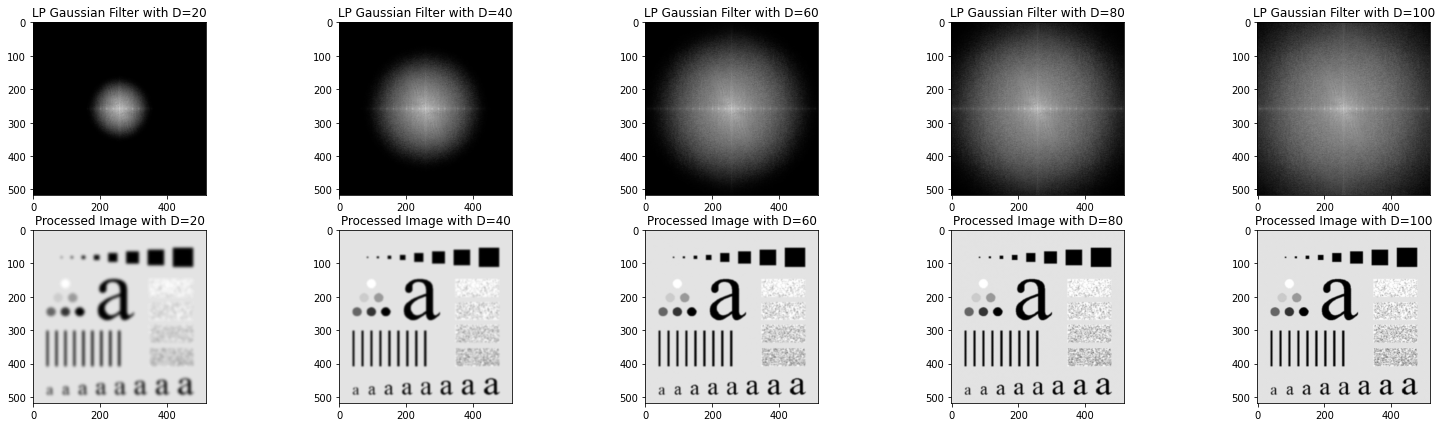

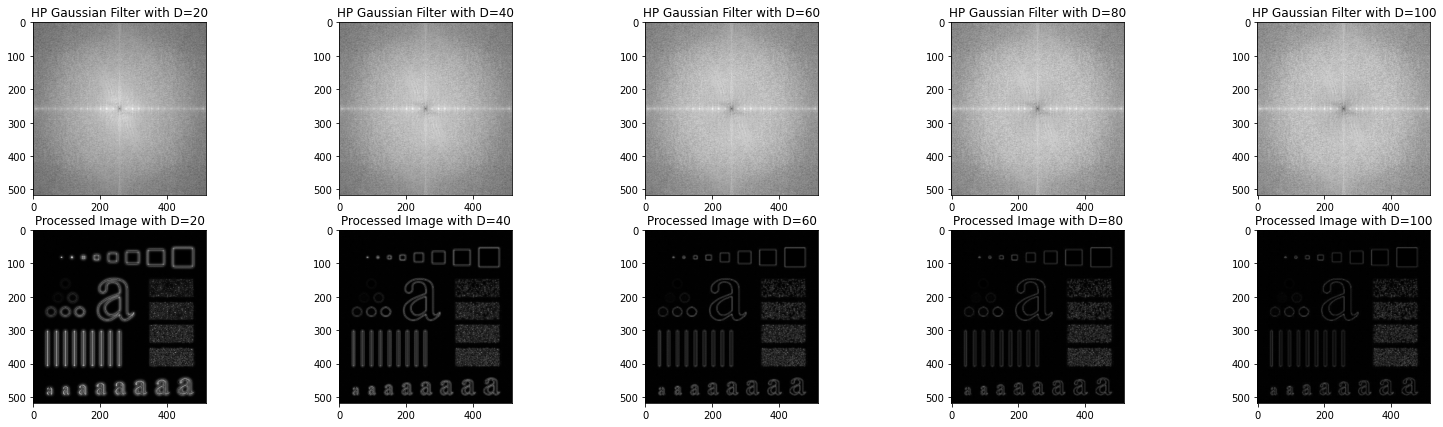

In [19]:
plt.figure(figsize=(6.4*5, 7), constrained_layout=False)
for d in range(1, 6):
  filtered = img_c3 * gaussianLP(d*20,img.shape)
  plt.subplot(2, 6, d), plt.imshow(np.log(1+np.abs(filtered)), "gray"), plt.title(f"LP Gaussian Filter with D={d*20}")
  LowPass = np.fft.ifftshift(filtered)
  inverse_LowPass = np.fft.ifft2(LowPass)
  plt.subplot(2, 6, d+6), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title(f"Processed Image with D={d*20}")

plt.show()
plt.figure(figsize=(6.4*5, 7), constrained_layout=False)

for d in range(1, 6):
  filtered = img_c3 * gaussianHP(d*20,img.shape)
  plt.subplot(2, 6, d), plt.imshow(np.log(1+np.abs(filtered)), "gray"), plt.title(f"HP Gaussian Filter with D={d*20}")
  LowPass = np.fft.ifftshift(filtered)
  inverse_LowPass = np.fft.ifft2(LowPass)
  plt.subplot(2, 6, d+6), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title(f"Processed Image with D={d*20}")

plt.show()